In [1]:
import zipfile

zip_file_paths = []

for path in zip_file_paths:
    name = str(path)
    with zipfile.ZipFile(path,'r') as zip_ref:
        zip_ref.extractall(f'{name.split(".")[0]}')

In [2]:
import pandas as pd

df_validation = pd.read_csv('Medical equipment/validation/labels/detections.csv')
df_validation.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,0001eeaf4aed83f9,xclick,/m/0cmf2,1,0.022673,0.964201,0.071038,0.800546,0,0,0,0,0
1,000595fe6fee6369,xclick,/m/02wbm,1,0.000000,1.000000,0.000000,1.000000,0,0,1,0,0
2,000595fe6fee6369,xclick,/m/02xwb,1,0.141384,0.179676,0.676275,0.731707,0,0,0,0,0
3,000595fe6fee6369,xclick,/m/02xwb,1,0.213549,0.253314,0.299335,0.354767,1,0,0,0,0
4,000595fe6fee6369,xclick,/m/02xwb,1,0.232695,0.288660,0.490022,0.545455,1,0,0,0,0


In [3]:
df_train = pd.read_csv('Medical equipment/train/labels/detections.csv')
df_train.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,...,0,0,0.148438,0.012500,0.059375,0.195312,0.148438,0.357812,0.587500,0.325000
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,...,0,0,0.025000,0.248438,0.276563,0.214062,0.914062,0.714063,0.782813,0.948438
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,...,0,0,0.243750,0.151562,0.310937,0.262500,0.198437,0.434375,0.507812,0.590625
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,...,0,0,0.315625,0.429688,0.256250,0.423438,0.651563,0.921875,0.826562,0.925000
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,...,0,0,0.317188,0.257812,0.346875,0.307812,0.235938,0.289062,0.348438,0.385938


In [4]:
print(f'{len(df_train) = }')
print(f'{len(df_validation) = }')

len(df_train) = 14610229
len(df_validation) = 303980


In [32]:
data_path_validation = "Medical equipment/validation/data/*.jpg"
data_path_train = "Medical equipment/train/data/*.jpg"

In [33]:
import glob

counter = 0

img_paths = data_path_validation
folder = glob.glob(img_paths)

for i in folder:
    counter += 1 
print(counter)

81


In [34]:
# Get image IDs

import glob

train_list_ids = []
validation_list_ids = []

def get_ids(split, to_append_list):
    start=0
    end=0
    folder = split
    img_paths = glob.glob(folder)
    img_ids = to_append_list
    
    for path in img_paths:
        file = path.split("/")[-1]
        id = file.split(".")[0]
        img_ids.append(id)
    
    print(f"{len(img_ids) = }")
    


In [35]:
get_ids(data_path_train, train_list_ids)
get_ids(data_path_validation, validation_list_ids)

len(img_ids) = 645
len(img_ids) = 81


In [9]:
train_list_ids[:5]

['27c28417c63557e8',
 'f40a44c8ec6629e9',
 '99e1bbf8198baeec',
 '9ae7d44ccbdfed5e',
 'e44994402793e1b1']

In [10]:
category = 'Medical equipment'

In [37]:
train_classes_df = pd.read_csv("Medical equipment/train/metadata/classes.csv",
                               names=['className','Object'])
validation_classes_df = pd.read_csv("Medical equipment/validation/metadata/classes.csv",
                               names=['className','Object'])

In [38]:
train_identifier = train_classes_df[train_classes_df['Object'] == category].className
validation_identifier = train_classes_df[validation_classes_df['Object'] == category].className
print(train_identifier)
print('------')
print(validation_identifier)


113    /m/01xgg_
Name: className, dtype: object
------
113    /m/01xgg_
Name: className, dtype: object


In [39]:
import random

def random_row_from_df(split):
    dataframe = ""
    if split == "train":
        dataframe, ids_to_check = df_train, train_list_ids
    elif split == "validation":
        dataframe, ids_to_check = df_validation, validation_list_ids
    else:
        raise Exception("Invalid parameter, must be either train or validation")
    
    img_ids_len = len(ids_to_check)
    
    rand = random.randint(0, img_ids_len-1)
    id = ids_to_check[rand]
    print(id)
    r = dataframe.loc[(dataframe.ImageID == id) & (dataframe.LabelName == '/m/01xgg_')]
    print(r)

In [41]:
random_row_from_df("validation")
# len(validation_list_ids)

fea234629eea3827
                 ImageID  Source  LabelName  Confidence      XMin      XMax  \
302615  fea234629eea3827  xclick  /m/01xgg_           1  0.073529  0.423529   
302616  fea234629eea3827  xclick  /m/01xgg_           1  0.164706  0.213235   
302617  fea234629eea3827  xclick  /m/01xgg_           1  0.214706  0.972059   

            YMin      YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
302615  0.758315  0.875831           0            0          1            0   
302616  0.235033  0.312639           0            0          0            0   
302617  0.000000  0.995565           1            1          0            0   

        IsInside  
302615         0  
302616         0  
302617         0  


In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image
import glob

data_path_validation = "Medical equipment/validation/data/*.jpg"
data_path_train = "Medical equipment/train/data/*.jpg"

def visualization_random_image(split):
    split_path =  data_path_train if split=="train" else data_path_validation if split == "validation" else 0
    if split_path == 0:
        raise Exception("Invalid input parameter. must be either train or validation")
    img_folder = split_path
    img_paths = glob.glob(img_folder)
    num_of_imgs = len(img_paths)
    random_int = random.randint(0, num_of_imgs-1)
    random_img = img_paths[random_int]
    img = mpimg.imread(random_img)
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticks([])
    ax.set_yticks([])
    imgplot = plt.imshow(img) # used to display images in the form of arrays or matrices
    # plt.show() # used to display the current figure that has been created using one or more mpl plotting commands
    

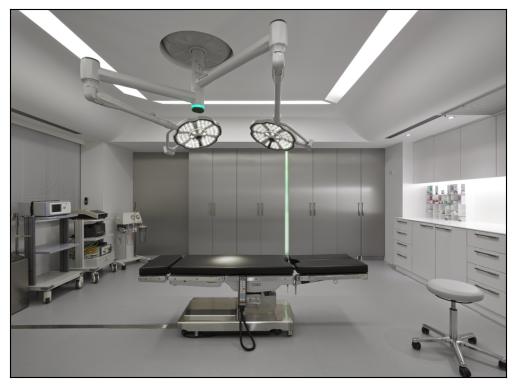

In [57]:
visualization_random_image("train")

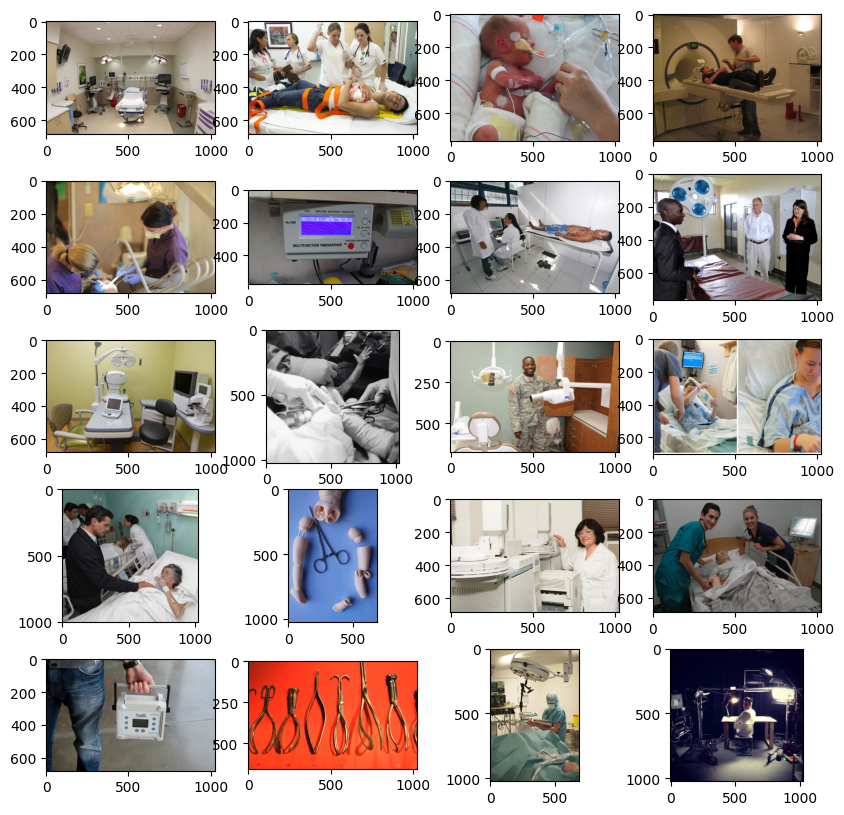

In [65]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

columns = 4
rows = 5

def visualize_many(from_num, to_num, dataset):
    dataset_path =  data_path_train if dataset=="train" else data_path_validation if dataset == "validation" else 0
    if dataset_path == 0:
        raise Exception("Invalid input parameter. must be either train or validation")
    
    images_paths = glob.glob(dataset_path)
    
    index_counter = 1
    for i in range(from_num, to_num):
        counter = i
        image = images_paths[counter]
        img = mpimg.imread(image)
        fig.add_subplot(rows, columns, index_counter)
        plt.imshow(img)
        index_counter +=1 
    plt.show()
    

visualize_many(0,20,"train")


In [68]:
df_validation.loc[(df_validation['ImageID'] == '3c636d621037a069') & (df_validation['LabelName'] == '/m/01xgg_')]

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
71898,3c636d621037a069,xclick,/m/01xgg_,1,0.422059,0.998529,0.554324,0.997783,1,1,0,0,0


1024 680


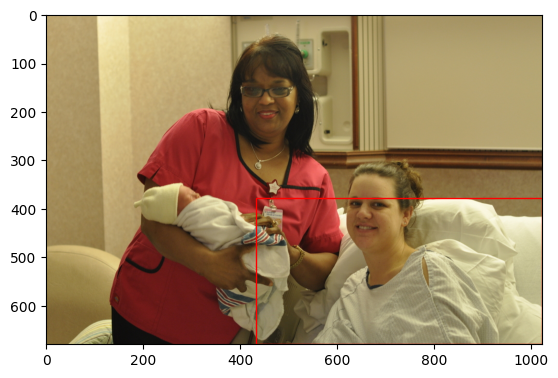

In [70]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open('/home/mat/Documents/object_pipeline/Medical equipment/validation/data/3c636d621037a069.jpg')

fig, ax = plt.subplots()
ax.imshow(im)
image_width, image_height = im.size # 1024, 680
print(image_width, image_height)

xmin = 0.422059
xmax = 0.998529

ymin = 0.554324
ymax = 0.997783


# new coordinates
xmin *= image_width
xmax *= image_width

ymin *= image_height
ymax *= image_height

width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor = 'r', facecolor = 'none')

ax.add_patch(rect)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def visualize_bb(dataset):
    dataset_path =  data_path_train if dataset=="train" else data_path_validation if dataset == "validation" else 0
    if dataset_path == 0:
        raise Exception("Invalid input parameter. must be either train or validation")
    
    start = 0
    end = 0
    
    if dataset == "train":
        start, end,df, split = 26, 42, df_train, "trainImages"
    elif dataset == 'validation':
        start, end,df, split = 31, 47, df_validation, "validationImages"
    else:
        raise Exception("Invalid paramet")
        